# Table of Contents:
1. [Library Imports](#li)
2. [Data Preparation](#dp)
3. [Method Comparison](#mc)
4. [Clustering](#cl)
5. [UMAP](#u)

# 1. Library Imports
<a id='li'></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from utils2 import *
import umap

### WARNINGS
import warnings
warnings.filterwarnings('ignore')

### AUTORELOAD
%load_ext autoreload
%autoreload 2

# 2. Data Preparation
<a id='dp'></a>

#### Import the data

In [35]:
# data = pd.read_csv('Data/New_Data/project_data_almano_educ_perc.csv')
# data = pd.read_csv('Data/New_Data/project_data_95_educ_perc.csv')
data = pd.read_csv('Data/New_Data/project_data_99_educ_perc.csv')

#### Define metrics to study NO MEAT!!!

In [49]:
preference_metrics = ['beer', 'bottled_water', 'bread', 'meat', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
preference_metrics_perc = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_meat', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']

preference_metrics_no_meat = ['beer', 'bottled_water', 'bread', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']
preference_metrics_perc_no_meat = ['percentage_beer', 'percentage_bottled_water', 'percentage_bread', 'percentage_dairy', 'percentage_fresh_foods', 'percentage_frozen_foods', 'percentage_fruit_beverages', 'percentage_pastry', 'percentage_sodas', 'percentage_toiletries', 'percentage_veggies', 'percentage_wines']

In [50]:
preference = data[preference_metrics]
preference_perc = data[preference_metrics_perc]

preference_no_meat = data[preference_metrics_no_meat]
preference_perc_no_meat = data[preference_metrics_perc_no_meat]

#### Scale the data

In [52]:
standard = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

In [53]:
pref_no_scl = preference_no_meat.copy()
pref_st_scl = standard.fit_transform(preference_no_meat)
pref_mm_scl = minmax.fit_transform(preference_no_meat)
pref_rb_scl = robust.fit_transform(preference_no_meat)

In [55]:
preference_no_scl = preference_no_meat.copy()
preference_no_scl[preference_metrics_no_meat] = pref_no_scl

preference_st_scl = preference_no_meat.copy()
preference_st_scl[preference_metrics_no_meat] = pref_st_scl

preference_mm_scl = preference_no_meat.copy()
preference_mm_scl[preference_metrics_no_meat] = pref_mm_scl

preference_rb_scl = preference_no_meat.copy()
preference_rb_scl[preference_metrics_no_meat] = pref_rb_scl

In [56]:
sample_original = preference.sample(frac=0.2, random_state=1)
sample_no_scl = preference_no_scl.sample(frac=0.2, random_state=1)
sample_st_scl = preference_st_scl.sample(frac=0.2, random_state=1)
sample_mm_scl = preference_mm_scl.sample(frac=0.2, random_state=1)
sample_rb_scl = preference_rb_scl.sample(frac=0.2, random_state=1)

---

In [9]:
df = pd.DataFrame()

In [10]:
df['sodas_no'] = preference_no_scl['pastry']
df['sodas_st'] = preference_st_scl['pastry']
df['sodas_mm'] = preference_mm_scl['pastry']
df['sodas_rb'] = preference_rb_scl['pastry']

In [11]:
df

,sodas_no,sodas_st,sodas_mm,sodas_rb
0,27,-0.636223,0.017279,-0.263158
1,31,-0.527644,0.025918,-0.052632
2,32,-0.500499,0.028078,0.000000
3,29,-0.581934,0.021598,-0.157895
4,45,-0.147618,0.056156,0.684211
...,...,...,...,...
122124,26,-0.663368,0.015119,-0.315789
122125,27,-0.636223,0.017279,-0.263158
122126,25,-0.690513,0.012959,-0.368421
122127,27,-0.636223,0.017279,-0.263158


In [12]:
df.describe()

,sodas_no,sodas_st,sodas_mm,sodas_rb
count,122129.000000,1.221290e+05,122129.000000,122129.000000
mean,50.438160,2.629722e-17,0.067901,0.970429
std,36.839669,1.000004e+00,0.079567,1.938930
min,19.000000,-8.533814e-01,0.000000,-0.684211
25%,28.000000,-6.090785e-01,0.019438,-0.210526
50%,32.000000,-5.004995e-01,0.028078,0.000000
75%,47.000000,-9.332803e-02,0.060475,0.789474
max,482.000000,1.171464e+01,1.000000,23.684211


In [13]:
from utils1 import plot_distributions, remove_outliers_iqr

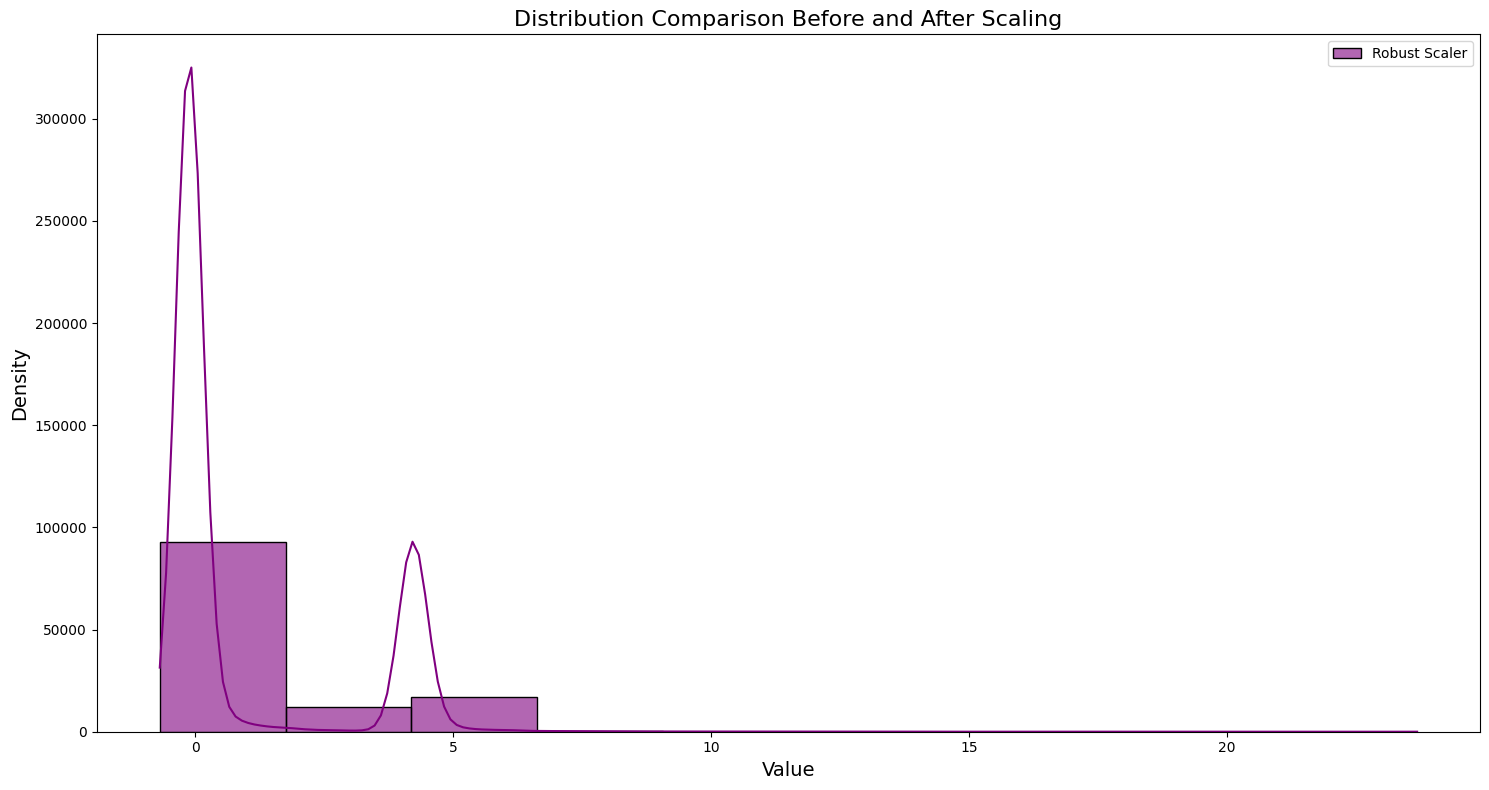

In [14]:
# Set up the plot
plt.figure(figsize=(15, 8))

# Plot the histograms/KDE plots
# sns.histplot(df['sodas_no'], kde=True, color='blue', label='Original', bins=10, alpha=0.6)
# sns.histplot(df['sodas_st'], kde=True, color='green', label='Standard Scaler', bins=10, alpha=0.6)
# sns.histplot(df['sodas_mm'], kde=True, color='red', label='MinMax Scaler', bins=10, alpha=0.6)
sns.histplot(df['sodas_rb'], kde=True, color='purple', label='Robust Scaler', bins=10, alpha=0.6)

# Add labels and title
plt.title('Distribution Comparison Before and After Scaling', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

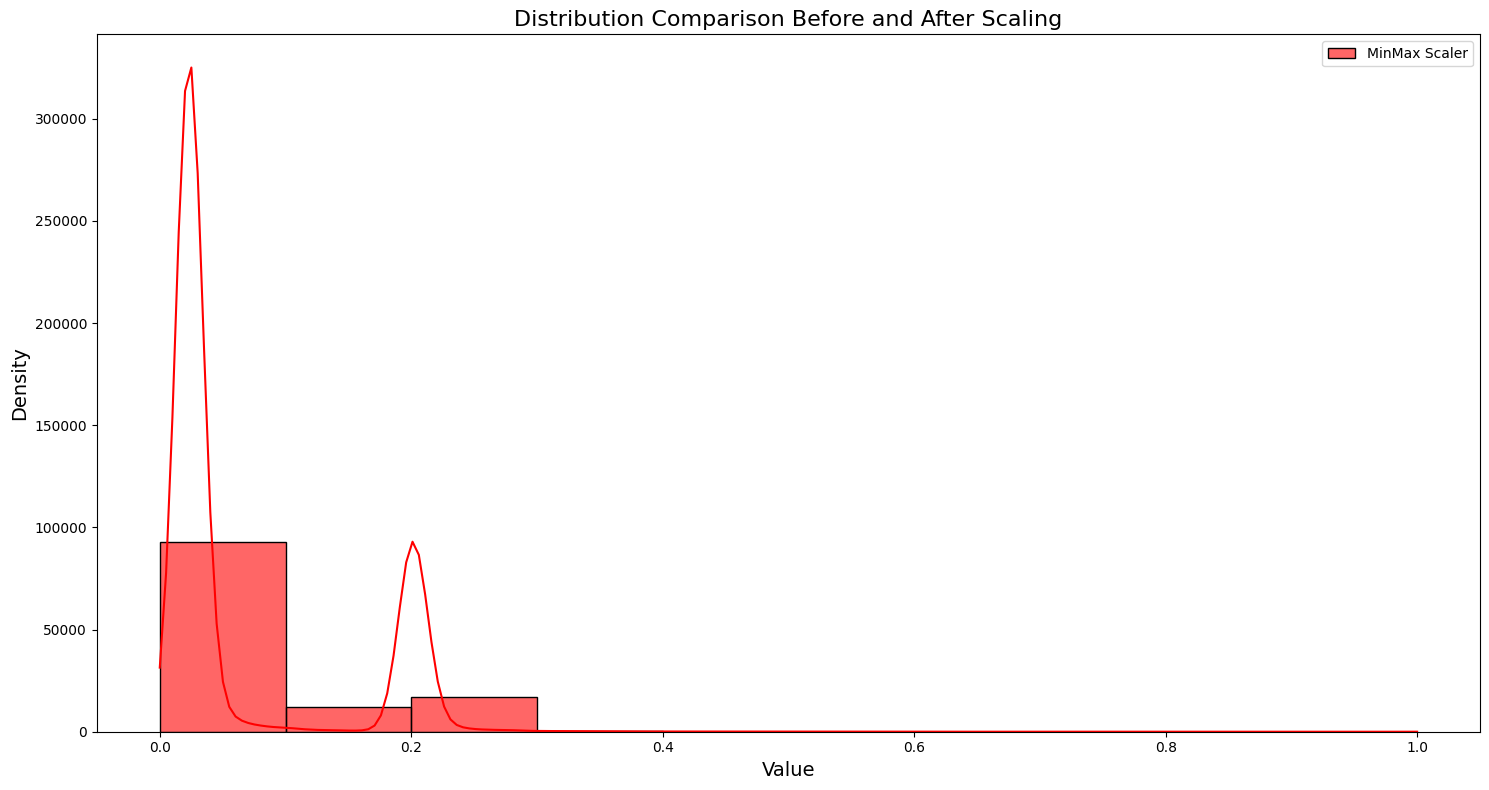

In [15]:
# Set up the plot
plt.figure(figsize=(15, 8))

# Plot the histograms/KDE plots
# sns.histplot(df['sodas_no'], kde=True, color='blue', label='Original', bins=10, alpha=0.6)
# sns.histplot(df['sodas_st'], kde=True, color='green', label='Standard Scaler', bins=10, alpha=0.6)
sns.histplot(df['sodas_mm'], kde=True, color='red', label='MinMax Scaler', bins=10, alpha=0.6)
# sns.histplot(df['sodas_rb'], kde=True, color='purple', label='Robust Scaler', bins=10, alpha=0.6)

# Add labels and title
plt.title('Distribution Comparison Before and After Scaling', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# 3. Clustering Method Comparison
<a id='mc'></a>

Here different clustering methods performance (based on R^2) will be compared to determine weather if it is even worth it to test all of them. This test will be performed for different types of scaled data.

- [No Scaler](#cmc-no)
- [Standard Scaler](#cmc-st)
- [MinMax Scaler](#cmc-mm)
- [Robust Scaler](#cmc-rb)

First, we will define the base clustering methods to be used in this test. Note that hierarchical clustering will be performed with eucledian distances as this is what is used by k-means, in order to ensure a fair comparison.

In [146]:
kmeans = KMeans(init='k-means++', n_init=10, random_state=1)
hierarchical = AgglomerativeClustering(metric='euclidean') # eucledian distance as kmeans uses it

### No Scaler <a id='cmc-no'></a>

In [ ]:
pref_no_r2_scores = get_r2_df(sample_no_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_no_r2_scores

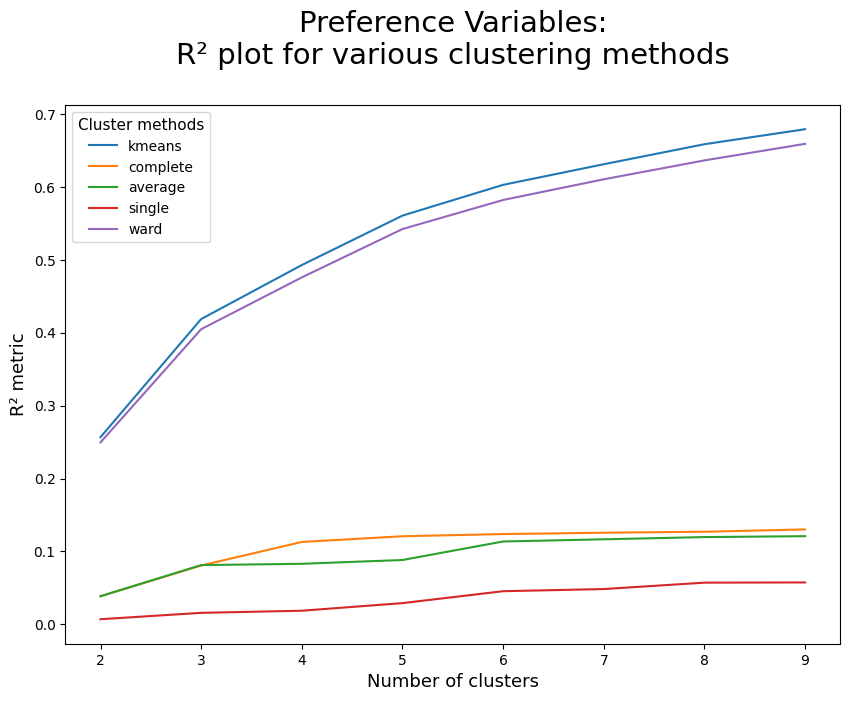

In [148]:
plot_r2_scores(pref_no_r2_scores)

### Standard Scaler <a id='cmc-st'></a>

In [149]:
pref_st_r2_scores = get_r2_df(sample_st_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_st_r2_scores

,kmeans,complete,average,single,ward
2,0.196091,0.078877,0.069569,0.006063,0.183960
3,0.331766,0.090766,0.079864,0.009760,0.304726
4,0.432057,0.094082,0.082252,0.016595,0.399223
5,0.479048,0.141180,0.123527,0.026308,0.454469
6,0.522941,0.147251,0.129256,0.052338,0.498933
7,0.550042,0.151497,0.130688,0.053436,0.530641
8,0.578878,0.165546,0.132631,0.065921,0.557080
9,0.597622,0.171265,0.133670,0.066176,0.583121


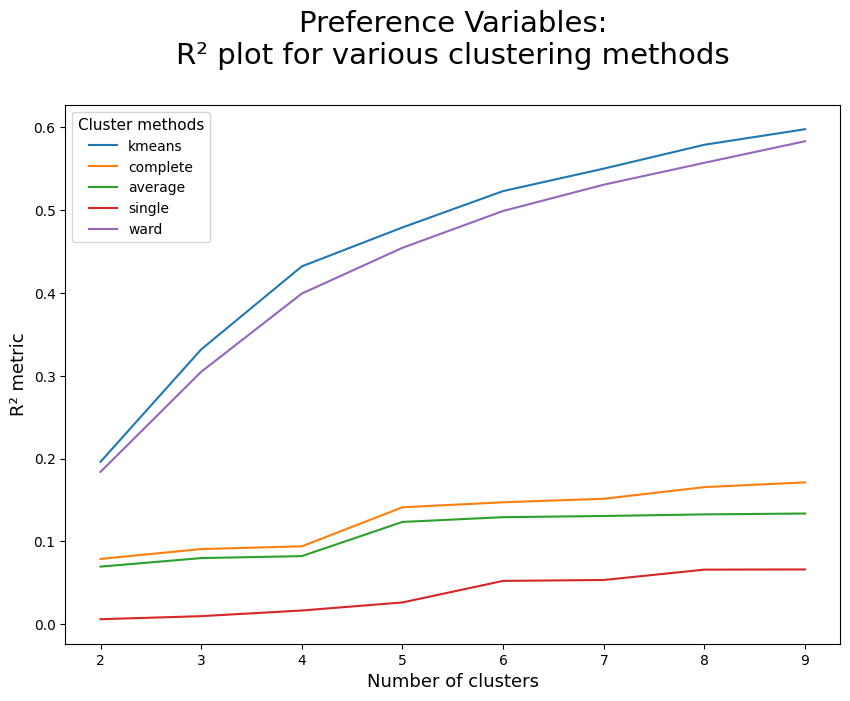

In [150]:
plot_r2_scores(pref_st_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering in the standard scaled data. A good number of clusters could be 4 or 7.

### MinMax Scaler 
<a id='cmc-mm'></a>

In [151]:
pref_mm_r2_scores = get_r2_df(sample_mm_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_mm_r2_scores

,kmeans,complete,average,single,ward
2,0.362970,0.012099,0.003648,0.000869,0.356471
3,0.480768,0.021078,0.006424,0.001822,0.463514
4,0.554919,0.024843,0.007293,0.002675,0.528642
5,0.598696,0.028341,0.019979,0.003633,0.585282
6,0.627162,0.033012,0.020440,0.005060,0.606278
7,0.652860,0.039889,0.020872,0.006155,0.626381
8,0.670335,0.040685,0.021209,0.006869,0.643919
9,0.685499,0.303399,0.022469,0.007497,0.660741


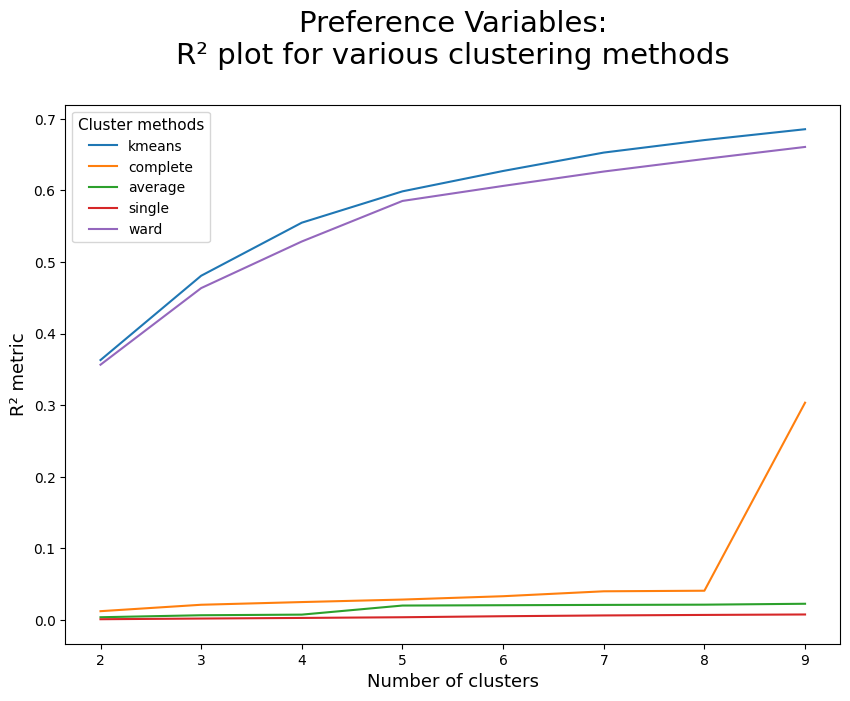

In [152]:
plot_r2_scores(pref_mm_r2_scores)

Kmeans and ward hierarchical clustering are the best algorithms to perfrom clustering in the minmax scaled data. A good number of clusters could be 3, 5 or 7.

### Robust Scaler <a id='cmc-rb'></a>

In [153]:
pref_rb_r2_scores = get_r2_df(sample_rb_scl, preference_metrics_no_meat, kmeans, hierarchical)
pref_rb_r2_scores

,kmeans,complete,average,single,ward
2,0.648714,0.446561,0.622932,0.146948,0.622932
3,0.832345,0.775661,0.676794,0.453841,0.815653
4,0.889802,0.802158,0.684074,0.612322,0.869515
5,0.915787,0.809438,0.876795,0.620091,0.913627
6,0.934419,0.918013,0.882429,0.620223,0.930538
7,0.943091,0.924745,0.899340,0.620442,0.938977
8,0.950891,0.925655,0.901104,0.621619,0.946343
9,0.958616,0.933232,0.902014,0.621897,0.953624


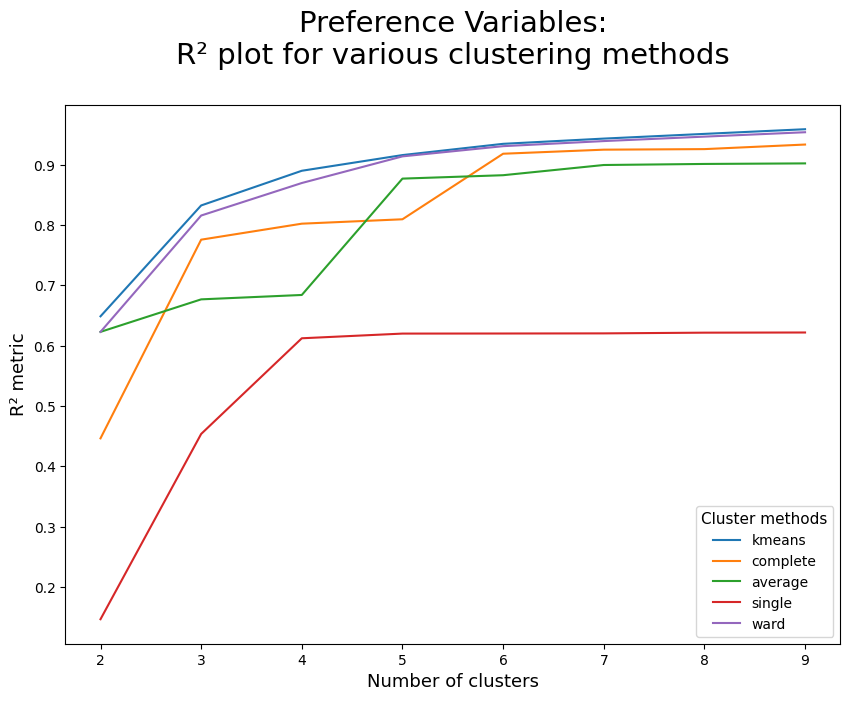

In [ ]:
plot_r2_scores(pref_rb_r2_scores)

### Conclusions
<a id='cmc-c'></a>

With this analysis we can confidently focus on using kmeans and hierarchical clustering with ward linkeage to conduct our analysis, as these were shown to  consistently give better results for all types of scaled data. The deminished performances for complete, average and single linkeage hierarchical methods were especially significant for the data with no scaling or with the standard or minmax scaler applied; however for robust scaled data k-means and ward hierarchical clustering were still the ones that provided better results.

It is also possible to see that solutiond with 3 to 6 clusters will likely yeild the best results, as it is mostly where the graphs present more significant changes in the slope. Additionally, a comparison among scaler results with these preselected clustering techniques was performed.

In [189]:
# Prefix the names of the columns
df_no_prefixed = pref_no_r2_scores.add_prefix("no_")
df_st_prefixed = pref_st_r2_scores.add_prefix("st_")
df_mm_prefixed = pref_mm_r2_scores.add_prefix("mm_")
df_rb_prefixed = pref_rb_r2_scores.add_prefix("rb_")

# Concatenate the dataframes
df_combined = pd.concat([df_no_prefixed, df_st_prefixed, df_mm_prefixed, df_rb_prefixed], axis=1)

# Filter ward and kmeans columns
filtered_columns = [col for col in df_combined.columns if 'ward' in col or 'kmeans' in col]

# Create a new dataframe with only the filtered columns
df_filtered = df_combined[filtered_columns]
df_filtered


,no_kmeans,no_ward,st_kmeans,st_ward,mm_kmeans,mm_ward,rb_kmeans,rb_ward
2,0.256706,0.249525,0.196091,0.183960,0.362970,0.356471,0.648714,0.622932
3,0.418519,0.404616,0.331766,0.304726,0.480768,0.463514,0.832345,0.815653
4,0.492526,0.475605,0.432057,0.399223,0.554919,0.528642,0.889802,0.869515
5,0.560270,0.541868,0.479048,0.454469,0.598696,0.585282,0.915787,0.913627
6,0.602425,0.581689,0.522941,0.498933,0.627162,0.606278,0.934419,0.930538
7,0.630689,0.610042,0.550042,0.530641,0.652860,0.626381,0.943091,0.938977
8,0.658113,0.635921,0.578878,0.557080,0.670335,0.643919,0.950891,0.946343
9,0.678663,0.658634,0.597622,0.583121,0.685499,0.660741,0.958616,0.953624


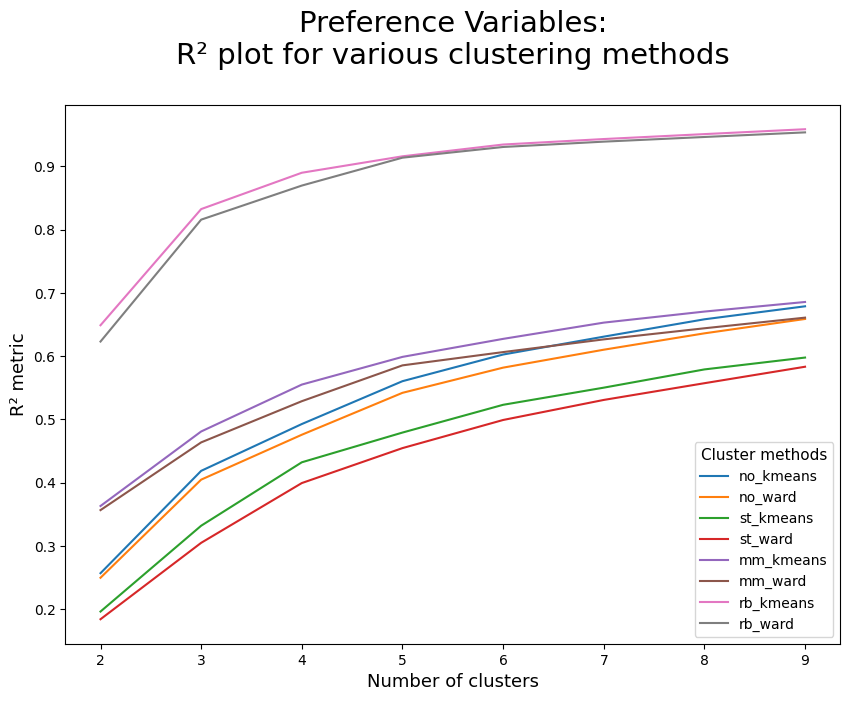

In [190]:
plot_r2_scores(df_filtered)

From the graph it is possible to conclude that robust scaler is likely to provide better results followed by minmax scaler, no scaled data, and standard scaler (in this order). Nonetheless, all scalers were tested.

# 4. Clustering
<a id='cl'></a>

In the notebook, the cluster analysis is grouped by data inputs - no scaling, standard scaler, minmax scaler, robust scaler. In each group, *n* methods of clustering were used and they are presented in this order:
1. [KMeans](#km)
2. [Ward (Hierarchical)](#wh)
3. [DBScan](#dbs)

In the end, it was possible to identify groups that recurrently appeared in the clustering solutions, and based on this, *x* solutions were chosen to be further studied.

## 4.1. K-means <a id='km'></a>

In this section, the k-means algorithm was tested with the data inputs previously mentioned. For each of the data inputs inertia and silhuette plots were done in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#km-no)
2. [Standard Scaler](#km-st)
3. [MinMax Scaler](#km-mm)
4. [Robust Scaler](#km-rb)

### No Scaler <a id='km-no'></a>

#### Plot

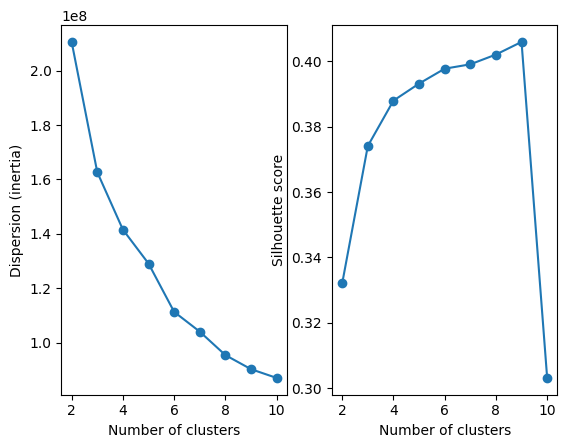

In [93]:
plot_inertia_and_silhouette(sample_no_scl, 2, 10)

#### Models

##### 3 clusters

In [95]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans3'] = kmeans.predict(sample_no_scl)

In [97]:
groupby_mean(sample_original, 'no_kmeans3', True)

# observations per cluster: [8793, 7949, 7684]


no_kmeans3,0,1,2
beer,46.310000,84.480000,45.400000
bottled_water,44.880000,83.290000,44.930000
bread,31.280000,30.620000,21.870000
meat,3.100000,2.270000,1.190000
dairy,31.870000,31.600000,77.630000
fresh_foods,109.590000,33.960000,32.370000
frozen_foods,65.830000,113.260000,31.990000
fruit_beverages,96.720000,21.590000,20.570000
pastry,62.410000,31.450000,55.100000
sodas,35.680000,34.620000,33.400000


fresh+beverage+(frozen+pastry) | beer+water+frozen | dairy+pastry

##### 4 clusters

In [98]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans4'] = kmeans.predict(sample_no_scl)

In [99]:
groupby_mean(sample_original, 'no_kmeans4', True)

# observations per cluster: [3869, 7850, 5043, 7664]


no_kmeans4,0,1,2,3
beer,48.620000,84.280000,45.620000,45.390000
bottled_water,45.770000,83.460000,44.700000,44.920000
bread,33.380000,30.270000,30.200000,21.840000
meat,7.330000,1.360000,1.380000,1.100000
dairy,35.830000,30.770000,30.450000,77.530000
fresh_foods,111.000000,32.920000,108.480000,32.280000
frozen_foods,117.270000,110.580000,31.390000,31.950000
fruit_beverages,98.250000,20.820000,95.120000,20.460000
pastry,32.520000,31.320000,85.360000,54.800000
sodas,40.420000,33.460000,33.950000,33.320000


fresh+beverage+frozen | beer+water+frozen | fresh+beverage+pastry | dairy+(pastry)

##### 6 clusters

In [102]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_no_scl)
sample_original['no_kmeans6'] = kmeans.predict(sample_no_scl)

In [103]:
groupby_mean(sample_original, 'no_kmeans6', True)

# observations per cluster: [2278, 7836, 3268, 5497, 113, 5434]


no_kmeans6,0,1,2,3,4,5
beer,45.940000,84.280000,45.630000,46.300000,118.700000,45.180000
bottled_water,45.240000,83.520000,44.650000,45.090000,57.960000,44.910000
bread,30.020000,30.330000,30.300000,30.920000,97.500000,18.480000
meat,1.180000,1.430000,1.870000,2.150000,149.770000,1.020000
dairy,60.930000,30.610000,30.460000,31.220000,201.700000,83.790000
fresh_foods,32.120000,33.160000,109.110000,108.810000,162.590000,32.430000
frozen_foods,32.740000,110.860000,32.520000,84.700000,314.670000,32.060000
fruit_beverages,20.540000,20.920000,95.540000,96.740000,124.030000,20.500000
pastry,114.540000,31.070000,114.290000,31.190000,53.550000,30.680000
sodas,32.850000,32.970000,34.540000,33.860000,317.520000,32.680000


pastry+(dairy) | beer+water+frozen | pastry+fresh+beverage | fresh+beverage+(frozen) | spenders(frozen+sodas) | dairy

#### Comparison

In [106]:
clusters_comparison(sample_original, 'no_kmeans4', 'no_kmeans3')

,no_kmeans3 0 Cluster,no_kmeans3 1 Cluster,no_kmeans3 2 Cluster
no_kmeans4 0 Cluster,3765,100,4
no_kmeans4 1 Cluster,2,7848,0
no_kmeans4 2 Cluster,5021,0,22
no_kmeans4 3 Cluster,5,1,7658


In [107]:
clusters_comparison(sample_original, 'no_kmeans6', 'no_kmeans4')

,no_kmeans4 0 Cluster,no_kmeans4 1 Cluster,no_kmeans4 2 Cluster,no_kmeans4 3 Cluster
no_kmeans6 0 Cluster,3,18,29,2228
no_kmeans6 1 Cluster,30,7806,0,0
no_kmeans6 2 Cluster,15,0,3253,0
no_kmeans6 3 Cluster,3733,2,1758,4
no_kmeans6 4 Cluster,87,14,1,11
no_kmeans6 5 Cluster,1,10,2,5421


### Standard Scaler <a id='km-st'></a>

#### Plot

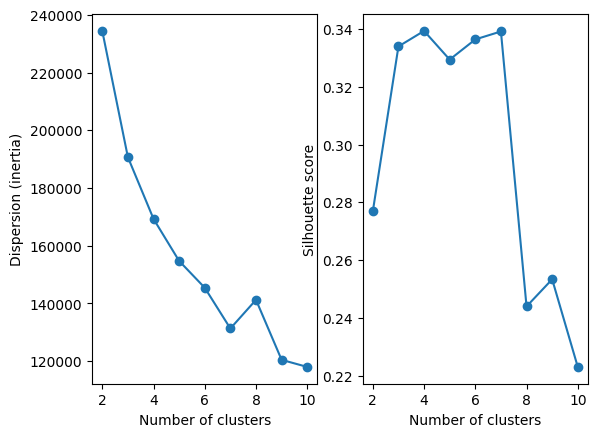

In [108]:
plot_inertia_and_silhouette(sample_st_scl, 2, 10)

#### Models

##### 3 clusters

In [111]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans3'] = kmeans.predict(sample_st_scl)

In [112]:
groupby_mean(sample_original, 'st_kmeans3', True)

# observations per cluster: [7858, 8806, 7762]


st_kmeans3,0,1,2
beer,85.440000,45.820000,45.450000
bottled_water,83.920000,44.730000,44.910000
bread,30.810000,31.210000,21.840000
meat,2.150000,2.820000,1.630000
dairy,31.150000,31.330000,78.240000
fresh_foods,34.210000,108.980000,32.700000
frozen_foods,112.430000,65.910000,33.640000
fruit_beverages,21.800000,96.210000,20.820000
pastry,31.500000,62.730000,54.390000
sodas,34.570000,35.330000,33.870000


beer+water+frozen | fresh+beverage+(frozen+pastry) | dairy+pastry

##### 4 clusters

In [113]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans4'] = kmeans.predict(sample_st_scl)

In [114]:
groupby_mean(sample_original, 'st_kmeans4', True)

# observations per cluster: [7836, 7751, 8767, 72]


st_kmeans4,0,1,2,3
beer,85.200000,45.350000,45.590000,122.760000
bottled_water,83.950000,44.900000,44.710000,57.220000
bread,30.250000,21.770000,30.250000,215.210000
meat,1.630000,1.320000,1.830000,213.260000
dairy,30.800000,77.540000,30.710000,226.690000
fresh_foods,34.020000,32.500000,108.420000,185.460000
frozen_foods,112.070000,33.410000,65.140000,232.220000
fruit_beverages,21.640000,20.650000,95.870000,139.080000
pastry,31.460000,54.420000,62.700000,56.600000
sodas,33.640000,33.160000,34.290000,338.440000


beer+water+frozen | dairy+pastry | fresh+beverage+(frozen+pastry) | spenders(sodas)

##### 7 clusters

In [115]:
kmeans = KMeans(n_clusters = 7, init='k-means++', n_init=20,  random_state = 1).fit(sample_st_scl)
sample_original['st_kmeans7'] = kmeans.predict(sample_st_scl)

In [116]:
groupby_mean(sample_original, 'st_kmeans7', True)

# observations per cluster: [4251, 7799, 5482, 4270, 2540, 39, 45]


st_kmeans7,0,1,2,3,4,5,6
beer,45.460000,85.200000,45.730000,45.120000,45.940000,102.540000,128.870000
bottled_water,44.700000,83.980000,44.800000,44.790000,45.370000,57.260000,58.380000
bread,29.890000,30.200000,30.400000,16.220000,28.420000,317.330000,75.090000
meat,1.390000,1.450000,2.070000,1.190000,1.750000,173.820000,212.000000
dairy,31.130000,30.640000,30.910000,83.100000,83.940000,64.080000,370.180000
fresh_foods,90.230000,33.820000,108.950000,31.960000,34.120000,148.590000,196.220000
frozen_foods,32.710000,111.610000,85.000000,33.560000,34.340000,155.850000,287.600000
fruit_beverages,77.470000,21.400000,96.810000,20.540000,21.500000,102.210000,151.710000
pastry,114.880000,31.220000,31.350000,36.790000,61.650000,49.440000,63.160000
sodas,34.060000,33.340000,34.190000,33.090000,32.740000,194.440000,473.820000


pastry+(fresh+beverage) | beer+water+frozen | fresh+beverage+(frozen) | dairy | dairy+(pastry)+veggies+wines | spenders(bread) | spenders(sodas)

#### Comparison

In [119]:
clusters_comparison(sample_original, 'st_kmeans4', 'st_kmeans3')

,st_kmeans3 0 Cluster,st_kmeans3 1 Cluster,st_kmeans3 2 Cluster
st_kmeans4 0 Cluster,7836,0,0
st_kmeans4 1 Cluster,0,1,7750
st_kmeans4 2 Cluster,0,8767,0
st_kmeans4 3 Cluster,22,38,12


In [122]:
clusters_comparison(sample_original, 'st_kmeans7', 'st_kmeans4')

,st_kmeans4 0 Cluster,st_kmeans4 1 Cluster,st_kmeans4 2 Cluster,st_kmeans4 3 Cluster
st_kmeans7 0 Cluster,7,955,3289,0
st_kmeans7 1 Cluster,7793,5,0,1
st_kmeans7 2 Cluster,14,9,5458,1
st_kmeans7 3 Cluster,2,4268,0,0
st_kmeans7 4 Cluster,15,2506,19,0
st_kmeans7 5 Cluster,0,0,0,39
st_kmeans7 6 Cluster,5,8,1,31


### MinMax Scaler <a id='km-mm'></a>

#### Plot

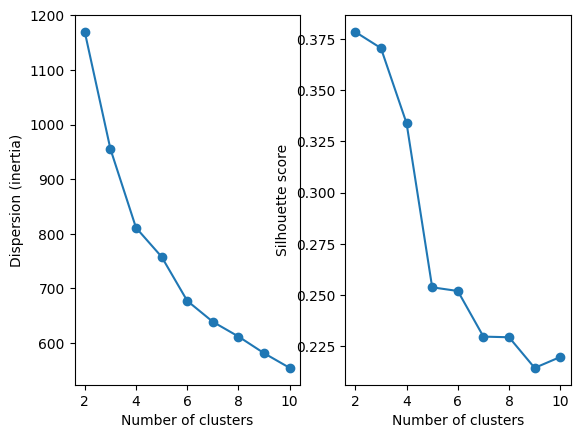

In [109]:
plot_inertia_and_silhouette(sample_mm_scl, 2, 10)

#### Models

##### 4 clusters

In [123]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans4'] = kmeans.predict(sample_mm_scl)

In [124]:
groupby_mean(sample_original, 'mm_kmeans4', True)

# observations per cluster: [5232, 7828, 8723, 2643]


mm_kmeans4,0,1,2,3
beer,45.350000,84.930000,46.260000,46.150000
bottled_water,44.720000,84.240000,44.610000,45.170000
bread,19.200000,30.680000,31.100000,28.200000
meat,1.170000,2.020000,3.040000,2.240000
dairy,73.410000,31.140000,32.050000,83.420000
fresh_foods,32.040000,34.160000,109.480000,34.910000
frozen_foods,33.820000,111.230000,66.780000,35.880000
fruit_beverages,20.490000,21.660000,96.810000,22.280000
pastry,52.450000,31.470000,62.310000,59.720000
sodas,33.760000,34.360000,35.650000,33.670000


dairy+pastry | beer+water+frozen | fresh+beverage+(frozen+pastry) | dairy+pastry+veggies+wines

##### 5 clusters

In [127]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans5'] = kmeans.predict(sample_mm_scl)

In [128]:
groupby_mean(sample_original, 'mm_kmeans5', True)

# observations per cluster: [3934, 7825, 4429, 2619, 5619]


mm_kmeans5,0,1,2,3,4
beer,45.750000,84.930000,45.230000,46.030000,46.660000
bottled_water,44.600000,84.240000,44.730000,45.150000,44.650000
bread,30.190000,30.620000,17.190000,28.060000,31.760000
meat,1.780000,2.020000,1.160000,2.070000,3.740000
dairy,32.540000,31.150000,79.680000,83.340000,32.930000
fresh_foods,93.050000,34.130000,31.680000,34.410000,110.120000
frozen_foods,33.480000,111.210000,34.140000,35.410000,85.250000
fruit_beverages,80.370000,21.660000,20.250000,21.830000,97.460000
pastry,114.890000,31.400000,40.890000,59.820000,33.220000
sodas,34.550000,34.360000,33.940000,32.950000,36.340000


pastry+(fresh+beverage) | beer+water+frozen | dairy | dairy+(pastry)+veggies+wines | fresh+beverage+(frozen)

##### 6 clusters

In [125]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_mm_scl)
sample_original['mm_kmeans6'] = kmeans.predict(sample_mm_scl)

In [126]:
groupby_mean(sample_original, 'mm_kmeans6', True)

# observations per cluster: [5619, 4069, 3764, 2616, 4426, 3932]


mm_kmeans6,0,1,2,3,4,5
beer,46.640000,84.930000,84.890000,46.020000,45.230000,45.740000
bottled_water,44.650000,84.400000,84.030000,45.130000,44.720000,44.600000
bread,31.700000,30.260000,31.120000,28.040000,17.180000,30.190000
meat,3.720000,1.600000,2.540000,2.030000,1.160000,1.780000
dairy,32.930000,31.040000,31.330000,83.360000,79.680000,32.540000
fresh_foods,110.070000,34.120000,34.260000,34.410000,31.640000,93.070000
frozen_foods,85.240000,111.010000,111.420000,35.340000,34.090000,33.460000
fruit_beverages,97.460000,21.670000,21.660000,21.810000,20.250000,80.380000
pastry,33.230000,31.390000,31.530000,59.830000,40.870000,114.850000
sodas,36.320000,34.160000,34.630000,32.930000,33.940000,34.550000


fresh+beverage+(frozen) | beer+water+frozen | beer+water+frozen+(toiletries) | dairy+(pastry)+veggies+wines | dairy | pastry+(fresh+beverage)

#### Comparison

In [130]:
clusters_comparison(sample_original, 'mm_kmeans5', 'mm_kmeans4')

,mm_kmeans4 0 Cluster,mm_kmeans4 1 Cluster,mm_kmeans4 2 Cluster,mm_kmeans4 3 Cluster
mm_kmeans5 0 Cluster,799,2,3119,14
mm_kmeans5 1 Cluster,0,7825,0,0
mm_kmeans5 2 Cluster,4399,0,0,30
mm_kmeans5 3 Cluster,28,0,0,2591
mm_kmeans5 4 Cluster,6,1,5604,8


In [135]:
clusters_comparison(sample_original, 'mm_kmeans6', 'mm_kmeans5')

,mm_kmeans5 0 Cluster,mm_kmeans5 1 Cluster,mm_kmeans5 2 Cluster,mm_kmeans5 3 Cluster,mm_kmeans5 4 Cluster
mm_kmeans6 0 Cluster,1,1,0,0,5617
mm_kmeans6 1 Cluster,1,4067,1,0,0
mm_kmeans6 2 Cluster,0,3757,2,3,2
mm_kmeans6 3 Cluster,0,0,0,2616,0
mm_kmeans6 4 Cluster,0,0,4426,0,0
mm_kmeans6 5 Cluster,3932,0,0,0,0


### Robust Scaler <a id='km-rb'></a>

#### Plot

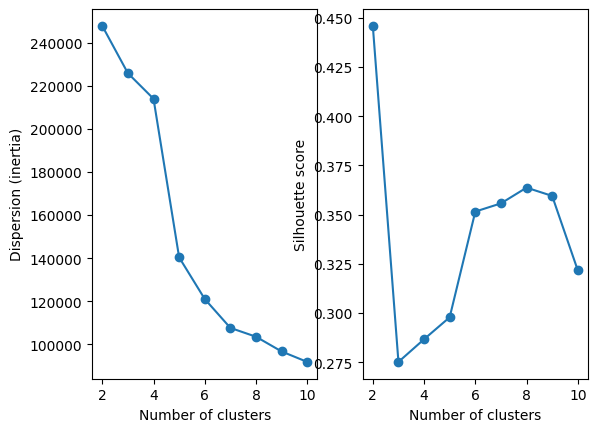

In [110]:
plot_inertia_and_silhouette(sample_rb_scl, 2, 10)

#### Models

##### 3 clusters

In [136]:
kmeans = KMeans(n_clusters = 3, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans3'] = kmeans.predict(sample_rb_scl)

In [137]:
groupby_mean(sample_original, 'rb_kmeans3', True)

# observations per cluster: [18743, 5636, 47]


rb_kmeans3,0,1,2
beer,61.970000,46.320000,108.020000
bottled_water,61.070000,45.180000,57.940000
bread,26.830000,30.090000,296.980000
meat,1.860000,2.020000,172.400000
dairy,46.850000,43.420000,106.890000
fresh_foods,55.340000,77.590000,167.700000
frozen_foods,80.800000,35.750000,192.450000
fruit_beverages,43.100000,65.060000,118.490000
pastry,30.630000,114.500000,56.110000
sodas,34.070000,34.840000,227.830000


general(beer+water+frozen) | pastry+(fresh+beverage) | spenders(bread+(sodas))

##### 5 clusters

In [139]:
kmeans = KMeans(n_clusters = 5, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans5'] = kmeans.predict(sample_rb_scl)

In [140]:
groupby_mean(sample_original, 'rb_kmeans5', True)

# observations per cluster: [967, 4212, 5602, 44, 13601]


rb_kmeans5,0,1,2,3,4
beer,53.190000,45.120000,46.230000,110.200000,67.810000
bottled_water,49.090000,44.750000,45.120000,56.800000,66.960000
bread,31.070000,14.910000,30.040000,305.800000,30.280000
meat,4.780000,1.160000,1.990000,184.020000,1.880000
dairy,82.010000,83.930000,43.290000,112.070000,32.920000
fresh_foods,48.110000,32.710000,77.320000,173.200000,63.030000
frozen_foods,49.700000,32.420000,35.490000,192.300000,98.010000
fruit_beverages,31.390000,21.110000,64.970000,123.430000,50.840000
pastry,34.310000,30.670000,114.460000,57.480000,30.590000
sodas,43.160000,33.400000,34.620000,241.980000,33.720000


veggies+dairy+wines | dairy + pastry+(fresh+beverage) + spenders(bread+(sodas)) | beer+water+frozen+(fresh+beverage)

##### 6 clusters

In [141]:
kmeans = KMeans(n_clusters = 6, init='k-means++', n_init=20,  random_state = 1).fit(sample_rb_scl)
sample_original['rb_kmeans6'] = kmeans.predict(sample_rb_scl)

In [142]:
groupby_mean(sample_original, 'rb_kmeans6', True)

# observations per cluster: [4250, 8116, 5472, 5593, 44, 951]


rb_kmeans6,0,1,2,3,4,5
beer,45.130000,82.890000,45.640000,46.220000,110.200000,52.550000
bottled_water,44.750000,82.000000,44.760000,45.120000,56.800000,48.830000
bread,15.060000,30.210000,30.400000,30.040000,305.800000,30.990000
meat,1.210000,1.560000,2.340000,1.990000,184.020000,4.730000
dairy,84.190000,33.390000,31.650000,43.310000,112.070000,82.850000
fresh_foods,32.330000,33.410000,107.650000,77.270000,173.200000,47.210000
frozen_foods,32.450000,107.600000,84.240000,35.430000,192.300000,48.560000
fruit_beverages,20.790000,21.270000,95.350000,64.890000,123.430000,30.510000
pastry,30.660000,30.580000,30.680000,114.520000,57.480000,34.360000
sodas,33.440000,33.320000,34.340000,34.600000,241.980000,43.110000


dairy | beer+water+frozen | fresh+beverage+(frozen) | pastry+(fresh+beverage) | spenders(bread+(sodas)) | veggies+dairy+wines

### Comparison

In [144]:
clusters_comparison(sample_original, 'rb_kmeans5', 'rb_kmeans3')

,rb_kmeans3 0 Cluster,rb_kmeans3 1 Cluster,rb_kmeans3 2 Cluster
rb_kmeans5 0 Cluster,934,31,2
rb_kmeans5 1 Cluster,4208,4,0
rb_kmeans5 2 Cluster,2,5600,0
rb_kmeans5 3 Cluster,0,0,44
rb_kmeans5 4 Cluster,13599,1,1


In [145]:
clusters_comparison(sample_original, 'rb_kmeans6', 'rb_kmeans5')

,rb_kmeans5 0 Cluster,rb_kmeans5 1 Cluster,rb_kmeans5 2 Cluster,rb_kmeans5 3 Cluster,rb_kmeans5 4 Cluster
rb_kmeans6 0 Cluster,0,4188,0,0,62
rb_kmeans6 1 Cluster,9,3,1,0,8103
rb_kmeans6 2 Cluster,9,21,8,0,5434
rb_kmeans6 3 Cluster,0,0,5593,0,0
rb_kmeans6 4 Cluster,0,0,0,44,0
rb_kmeans6 5 Cluster,949,0,0,0,2


## 4.2. Hierarchical (Ward) <a id='wh'></a>

In this section, the hierarchical algorithm with a ward linkeage method was tested with the data inputs previously mentioned. For each of the data inputs dendrograms were plotted in order to decide which number of cluester were going to be considered for testing. Then, the clusters formed were analysed and clustering solutions compared. The tests for each data input were presented in the following order:
1. [No Scaler](#h-no)
2. [Standard Scaler](#h-st)
3. [MinMax Scaler](#h-mm)
4. [Robust Scaler](#h-rb)

### No Scaler <a id='h-no'></a>

#### Plot

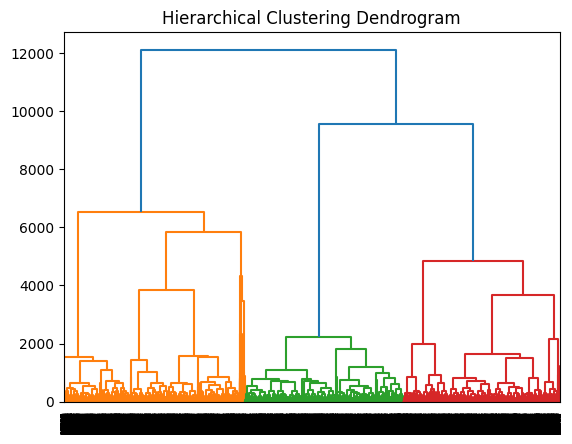

In [20]:
plot_dendrogram(sample_no_scl, 'ward')

#### Models

##### 3 clusters

In [58]:
sample_original['no_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_no_scl)

In [59]:
groupby_mean(sample_original, 'no_ward3', True)

# observations per cluster: [8959, 7660, 7807]


no_ward3,0,1,2
beer,47.060000,45.350000,84.370000
bottled_water,45.330000,45.010000,83.390000
bread,31.860000,21.760000,30.010000
meat,4.340000,0.920000,1.080000
dairy,33.830000,76.520000,30.580000
fresh_foods,108.420000,32.770000,33.300000
frozen_foods,69.580000,32.210000,109.500000
fruit_beverages,95.620000,20.750000,21.070000
pastry,62.500000,54.670000,31.170000
sodas,38.300000,32.490000,32.480000


fresh+beverage+(frozen+pastry) | dairy+(pastry) | beer+water+frozen

##### 5 clusters

In [64]:
sample_original['no_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_no_scl)

In [65]:
groupby_mean(sample_original, 'no_ward5', True)

# observations per cluster: [7660, 267, 7807, 3289, 5403]


no_ward5,0,1,2,3,4
beer,45.350000,90.190000,84.370000,45.480000,45.880000
bottled_water,45.010000,60.440000,83.390000,44.740000,44.940000
bread,21.760000,83.550000,30.010000,30.070000,30.410000
meat,0.920000,92.350000,1.080000,1.680000,1.610000
dairy,76.520000,130.370000,30.580000,30.920000,30.830000
fresh_foods,32.770000,122.210000,33.300000,106.970000,108.620000
frozen_foods,32.210000,249.930000,109.500000,33.850000,82.420000
fruit_beverages,20.750000,89.160000,21.070000,94.270000,96.760000
pastry,54.670000,50.460000,31.170000,115.250000,30.990000
sodas,32.490000,186.060000,32.480000,33.940000,33.660000


dairy+(pastry) | spenders(frozen+sodas) | beer+water+frozen | pastry+fresh+beverage | fresh+beverage+(frozen)

#### Comparison

In [67]:
clusters_comparison(sample_original, 'no_ward5', 'no_ward3')

,no_ward3 0 Cluster,no_ward3 1 Cluster,no_ward3 2 Cluster
no_ward5 0 Cluster,0,7660,0
no_ward5 1 Cluster,267,0,0
no_ward5 2 Cluster,0,0,7807
no_ward5 3 Cluster,3289,0,0
no_ward5 4 Cluster,5403,0,0


### Standard Scaler <a id='h-st'></a>

#### Plot

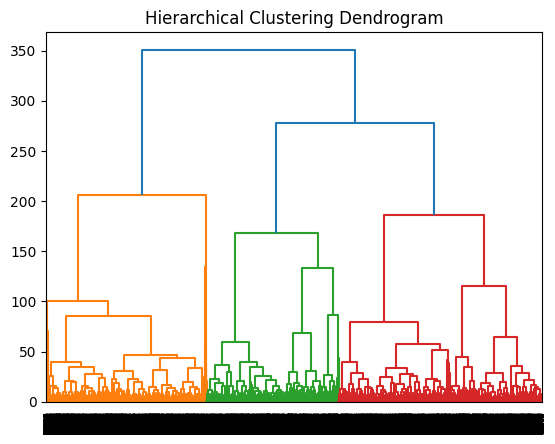

In [21]:
plot_dendrogram(sample_st_scl, 'ward')

#### Models

##### 3 clusters

In [68]:
sample_original['st_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_st_scl)

In [69]:
groupby_mean(sample_original, 'st_ward3', True)

# observations per cluster: [7904, 10000, 6522]


st_ward3,0,1,2
beer,85.510000,45.430000,45.610000
bottled_water,83.540000,44.730000,45.120000
bread,31.840000,30.110000,20.490000
meat,3.560000,1.770000,1.310000
dairy,33.260000,32.760000,82.410000
fresh_foods,35.740000,97.740000,34.110000
frozen_foods,112.290000,60.960000,34.930000
fruit_beverages,23.250000,85.510000,21.650000
pastry,31.730000,69.390000,42.530000
sodas,37.120000,33.830000,32.800000


beer+water+frozen | fresh+beverage+(frozen+pastry) | dairy

##### 6 clusters

In [70]:
sample_original['st_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_st_scl)

In [71]:
groupby_mean(sample_original, 'st_ward6', True)

# observations per cluster: [71, 2633, 4533, 7833, 5467, 3889]


st_ward6,0,1,2,3,4,5
beer,116.030000,46.370000,45.180000,85.230000,45.630000,45.100000
bottled_water,59.310000,45.390000,44.580000,83.760000,44.860000,44.940000
bread,221.100000,27.990000,29.670000,30.130000,30.480000,15.420000
meat,201.390000,1.620000,1.080000,1.770000,2.340000,1.100000
dairy,210.100000,82.710000,34.800000,31.660000,31.070000,82.200000
fresh_foods,167.460000,36.470000,84.760000,34.540000,108.500000,32.520000
frozen_foods,237.490000,34.900000,32.340000,111.150000,84.700000,34.940000
fruit_beverages,125.660000,22.650000,72.570000,22.320000,96.240000,20.970000
pastry,52.300000,59.880000,114.540000,31.540000,31.960000,30.780000
sodas,320.590000,32.820000,33.020000,34.550000,34.500000,32.780000


spenders(sodas) | dairy+pastry+veggies+wines | pastry+(fruit+beverage) | beer+water+frozen | fresh+beverage+(frozen) | dairy

#### Comparison

In [72]:
clusters_comparison(sample_original, 'st_ward6', 'st_ward3')

,st_ward3 0 Cluster,st_ward3 1 Cluster,st_ward3 2 Cluster
st_ward6 0 Cluster,71,0,0
st_ward6 1 Cluster,0,0,2633
st_ward6 2 Cluster,0,4533,0
st_ward6 3 Cluster,7833,0,0
st_ward6 4 Cluster,0,5467,0
st_ward6 5 Cluster,0,0,3889


### MinMax Scaler <a id='h-mm'></a>

#### Plot

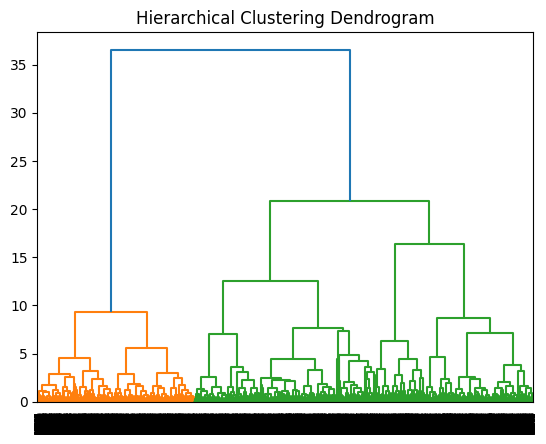

In [22]:
plot_dendrogram(sample_mm_scl, 'ward')

#### Models

##### 2 clusters

In [73]:
sample_original['mm_ward2'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 2
    ).fit_predict(sample_mm_scl)

In [74]:
groupby_mean(sample_original, 'mm_ward2', True)

# observations per cluster: [16666, 7760]


mm_ward2,0,1
beer,46.530000,84.040000
bottled_water,44.880000,84.270000
bread,27.160000,30.130000
meat,2.600000,1.430000
dairy,53.440000,30.580000
fresh_foods,73.330000,33.530000
frozen_foods,52.120000,110.350000
fruit_beverages,60.870000,21.350000
pastry,58.800000,31.200000
sodas,35.120000,33.540000


general | bee+water+frozen

##### 3 clusters

In [75]:
sample_original['mm_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_mm_scl)

In [76]:
groupby_mean(sample_original, 'mm_ward3', True)

# observations per cluster: [7797, 7760, 8869]


mm_ward3,0,1,2
beer,45.310000,84.040000,47.600000
bottled_water,44.870000,84.270000,44.880000
bread,21.960000,30.130000,31.730000
meat,1.210000,1.430000,3.820000
dairy,76.430000,30.580000,33.230000
fresh_foods,32.460000,33.530000,109.260000
frozen_foods,33.780000,110.350000,68.240000
fruit_beverages,20.570000,21.350000,96.300000
pastry,54.680000,31.200000,62.430000
sodas,32.830000,33.540000,37.140000


dairy+pastry | beer+water+frozen | fresh+beverage+(frozen+pastry)

##### 5 clusters

In [77]:
sample_original['mm_ward5'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 5
    ).fit_predict(sample_mm_scl)

In [78]:
groupby_mean(sample_original, 'mm_ward5', True)

# observations per cluster: [7760, 5649, 5284, 2513, 3220]


mm_ward5,0,1,2,3,4
beer,84.040000,48.830000,45.200000,45.540000,45.440000
bottled_water,84.270000,45.030000,44.830000,44.960000,44.640000
bread,30.130000,32.800000,19.350000,27.470000,29.840000
meat,1.430000,5.150000,1.030000,1.580000,1.490000
dairy,30.580000,34.930000,72.730000,84.210000,30.240000
fresh_foods,33.530000,110.200000,32.330000,32.730000,107.610000
frozen_foods,110.350000,88.120000,33.940000,33.450000,33.370000
fruit_beverages,21.350000,96.940000,20.560000,20.580000,95.160000
pastry,31.200000,32.370000,53.150000,57.890000,115.170000
sodas,33.540000,39.040000,33.030000,32.420000,33.800000


beer+water+frozen | fresh+beverage+(frozen) | dairy+pastry | dairy+pastry+veggies+wine | pastry+fresh+beverage

#### Comparison

In [88]:
clusters_comparison(sample_original, 'mm_ward3', 'mm_ward2')

,mm_ward2 0 Cluster,mm_ward2 1 Cluster
mm_ward3 0 Cluster,7797,0
mm_ward3 1 Cluster,0,7760
mm_ward3 2 Cluster,8869,0


In [89]:
clusters_comparison(sample_original, 'mm_ward5', 'mm_ward3')

,mm_ward3 0 Cluster,mm_ward3 1 Cluster,mm_ward3 2 Cluster
mm_ward5 0 Cluster,0,7760,0
mm_ward5 1 Cluster,0,0,5649
mm_ward5 2 Cluster,5284,0,0
mm_ward5 3 Cluster,2513,0,0
mm_ward5 4 Cluster,0,0,3220


### Robust Scaler <a id='h-rb'></a>

#### Plot

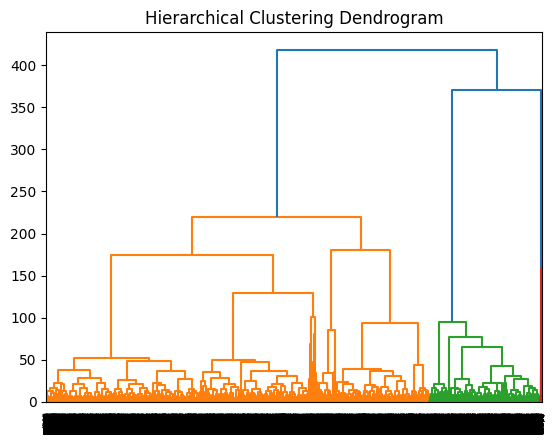

In [23]:
plot_dendrogram(sample_rb_scl, 'ward')

#### Models

##### 3 clusters

In [82]:
sample_original['rb_ward3'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 3
    ).fit_predict(sample_rb_scl)

In [83]:
groupby_mean(sample_original, 'rb_ward3', True)

# observations per cluster: [18894, 58, 5474]


rb_ward3,0,1,2
beer,61.950000,104.790000,45.850000
bottled_water,60.950000,58.000000,45.100000
bread,26.950000,267.140000,29.570000
meat,2.060000,162.810000,1.100000
dairy,46.930000,126.810000,42.730000
fresh_foods,55.790000,162.900000,76.510000
frozen_foods,80.870000,210.830000,33.770000
fruit_beverages,43.440000,124.100000,64.340000
pastry,31.310000,54.620000,114.600000
sodas,34.550000,213.640000,32.950000


general(beer+water+frozen) | spenders(bread+(frozen+sodas)) | pastry+(fresh+beverage)

##### 4 clusters

In [84]:
sample_original['rb_ward4'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 4
    ).fit_predict(sample_rb_scl)

In [85]:
groupby_mean(sample_original, 'rb_ward4', True)

# observations per cluster: [5551, 13343, 5474, 58]


rb_ward4,0,1,2,3
beer,45.820000,68.670000,45.850000,104.790000
bottled_water,45.440000,67.410000,45.100000,58.000000
bread,18.620000,30.410000,29.570000,267.140000
meat,1.100000,2.460000,1.100000,162.810000
dairy,82.550000,32.110000,42.730000,126.810000
fresh_foods,34.080000,64.820000,76.510000,162.900000
frozen_foods,34.050000,100.340000,33.770000,210.830000
fruit_beverages,21.330000,52.630000,64.340000,124.100000
pastry,31.190000,31.360000,114.600000,54.620000
sodas,32.900000,35.240000,32.950000,213.640000


dairy | beer+water+frozen+(fresh+beverage) | pastry+(fresh+beverage) | spenders(bread+(frozen+sodas))

##### 6 clusters

In [86]:
sample_original['rb_ward6'] = AgglomerativeClustering(
    linkage = 'ward', n_clusters = 6
    ).fit_predict(sample_rb_scl)

In [87]:
groupby_mean(sample_original, 'rb_ward6', True)

# observations per cluster: [58, 5795, 5474, 4662, 889, 7548]


rb_ward6,0,1,2,3,4,5
beer,104.790000,48.740000,45.850000,45.030000,49.950000,83.960000
bottled_water,58.000000,45.690000,45.100000,44.790000,48.840000,84.080000
bread,267.140000,31.350000,29.570000,16.490000,29.800000,29.690000
meat,162.810000,4.390000,1.100000,0.900000,2.140000,0.980000
dairy,126.810000,34.630000,42.730000,83.430000,77.940000,30.180000
fresh_foods,162.900000,106.500000,76.510000,32.230000,43.780000,32.820000
frozen_foods,210.830000,87.460000,33.770000,32.290000,43.270000,110.240000
fruit_beverages,124.100000,93.920000,64.340000,20.550000,25.400000,20.940000
pastry,54.620000,32.380000,114.600000,30.680000,33.900000,30.580000
sodas,213.640000,39.170000,32.950000,32.530000,34.840000,32.230000


spenders(bread+(frozen+sodas)) | fresh+beverage+(frozen) | pastry+(fresh+beverage) | dairy+veggies+wine | beer+water+frozen

#### Comparison

In [91]:
clusters_comparison(sample_original, 'rb_ward4', 'rb_ward3')

,rb_ward3 0 Cluster,rb_ward3 1 Cluster,rb_ward3 2 Cluster
rb_ward4 0 Cluster,5551,0,0
rb_ward4 1 Cluster,13343,0,0
rb_ward4 2 Cluster,0,0,5474
rb_ward4 3 Cluster,0,58,0


In [92]:
clusters_comparison(sample_original, 'rb_ward6', 'rb_ward4')

,rb_ward4 0 Cluster,rb_ward4 1 Cluster,rb_ward4 2 Cluster,rb_ward4 3 Cluster
rb_ward6 0 Cluster,0,0,0,58
rb_ward6 1 Cluster,0,5795,0,0
rb_ward6 2 Cluster,0,0,5474,0
rb_ward6 3 Cluster,4662,0,0,0
rb_ward6 4 Cluster,889,0,0,0
rb_ward6 5 Cluster,0,7548,0,0


# 4.3. DBScan <a id='dbs'></a>

After the previous analysis, using kmeans and hierarchical clustering, despite having found some **consistent clusters**, the **poor results of the robust scaled data** input (which resulted in one big cluster which cointained most of the dataset, alongside other very small clusters, mainly of observations with high spent amounts in several categories) raised some concernes. Especially since the data used had a big **presence of outliers**, meaning that, theoretically, the robust scaler should be the one dealing best with it.

This led to the belief that the presence of the outliers which were not removed in the preprocessing stage could be having some impact in the clustering solutions until now presented. 

To ensure that this was not the case, **DBScan** (a clustering technique by nature **robust to outliers**) was used. Similarly to what happened until now, the 4 different data inputs were tested. For each input, a Kdist graph was plotted (to help find the right eps value). Then **parameters were adjusted**, and clustering solutions created. These solutions were once again compared.

The data inputs were tested in the following order:
1. [No Scaler](#dbs-no)
2. [Standard Scaler](#dbs-st)
3. [MinMax Scaler](#dbs-mm)
4. [Robust Scaler](#dbs-rb)


### No Scaler <a id='dbs-no'></a>

#### Plot

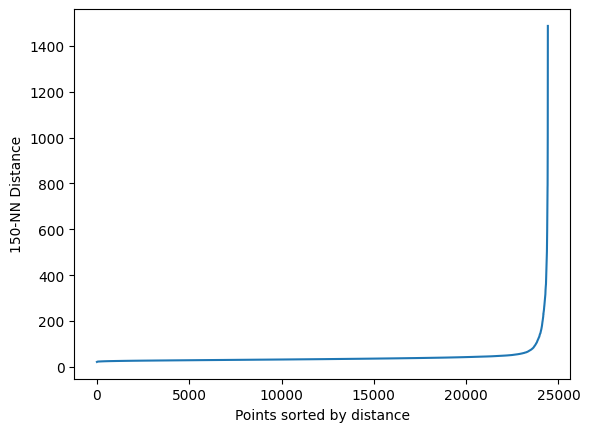

In [408]:
plot_kdist_graph(sample_no_scl, preference_metrics)

#### Models

### Standard Scaler <a id='dbs-st'></a>

#### Plot

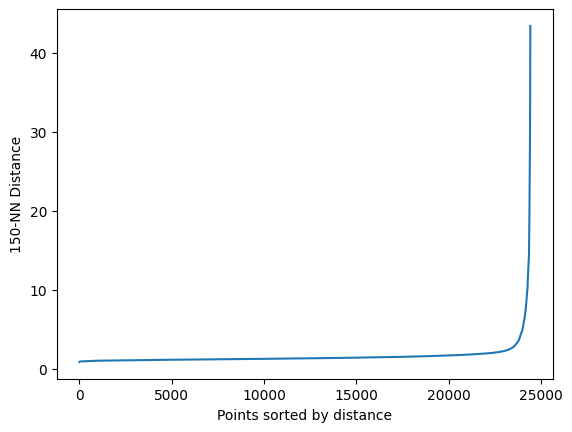

In [407]:
plot_kdist_graph(sample_st_scl, preference_metrics)

### MinMax Scaler <a id='dbs-mm'></a>

#### Plot

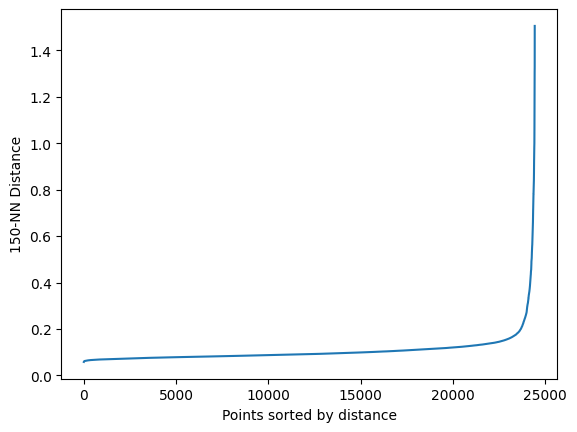

In [405]:
plot_kdist_graph(sample_mm_scl, preference_metrics)

### Robust Scaler <a id='dbs-rb'></a>

#### Plot

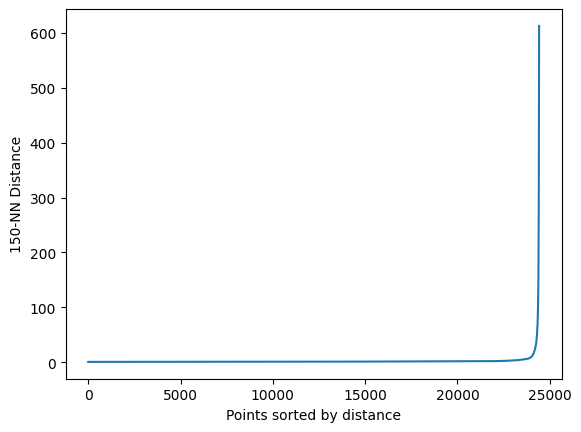

In [406]:
plot_kdist_graph(sample_rb_scl, preference_metrics)

In [ ]:
from sklearn.cluster import DBSCAN  # For the DBSCAN algorithm
import numpy as np                  # For numerical operations (e.g., np.unique)
from collections import Counter 

In [137]:
dbscan = DBSCAN(eps=1.3, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 5
Counter of cluster labels     : Counter({np.int64(1): 11235, np.int64(2): 4728, np.int64(0): 4094, np.int64(-1): 1786, np.int64(3): 494})
Percentage of noise rows      : 8.0


In [138]:
sample_original['dbs_rb'] = dbscan_labels
groupby_mean(sample_original, 'dbs_rb').iloc[:-1, :-1].style.background_gradient(axis=0)

dbs_rb,-1,0,1,2,3
beer,56.200000,44.890000,68.090000,44.850000,45.020000
bottled_water,54.680000,44.730000,67.860000,44.640000,44.660000
bread,27.470000,16.310000,29.580000,29.600000,29.260000
meat,5.590000,0.080000,0.080000,0.070000,0.040000
dairy,50.160000,82.970000,29.650000,40.900000,82.830000
fresh_foods,60.890000,31.700000,61.820000,76.160000,30.750000
frozen_foods,67.510000,31.120000,98.530000,31.170000,30.480000
fruit_beverages,46.090000,19.680000,49.790000,64.390000,20.290000
pastry,55.370000,30.320000,30.290000,112.400000,30.130000
sodas,36.570000,32.130000,32.270000,31.790000,29.660000


In [ ]:
dbscan = DBSCAN(eps=1.2, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 6876, np.int64(1): 4695, np.int64(2): 4527, np.int64(3): 3920, np.int64(-1): 3893, np.int64(4): 515})
Percentage of noise rows      : 15.94


In [87]:
sample_original['dbs_rb'] = dbscan_labels
groupby_mean(sample_original, 'dbs_rb').iloc[:-1, :-1].style.background_gradient(axis=0)

dbs_rb,-1,0,1,2,3,4
beer,61.460000,83.670000,44.900000,44.920000,44.840000,44.790000
bottled_water,54.610000,84.140000,44.630000,44.690000,44.750000,45.540000
bread,33.810000,29.630000,29.620000,29.500000,16.200000,29.210000
meat,13.690000,0.070000,0.050000,0.050000,0.050000,0.020000
dairy,59.570000,29.660000,29.650000,40.690000,83.100000,83.340000
fresh_foods,69.280000,31.970000,106.900000,77.520000,31.460000,32.280000
frozen_foods,80.800000,108.710000,81.590000,31.140000,31.260000,31.660000
fruit_beverages,52.990000,20.190000,95.030000,66.190000,20.160000,19.800000
pastry,57.980000,30.330000,30.380000,112.750000,30.400000,30.440000
sodas,50.200000,31.680000,32.110000,31.490000,31.630000,29.270000


In [67]:
dbscan = DBSCAN(eps=1.3, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 6
Counter of cluster labels     : Counter({np.int64(0): 7027, np.int64(1): 4850, np.int64(2): 4756, np.int64(3): 4183, np.int64(-1): 2993, np.int64(4): 617})
Percentage of noise rows      : 12.25


In [85]:
sample_original['dbs_rb'] = dbscan_labels
groupby_mean(sample_original, 'dbs_rb').iloc[:-1, :-1].style.background_gradient(axis=0)

dbs_rb,-1,0,1,2,3,4
beer,64.520000,83.620000,44.900000,44.950000,44.880000,44.810000
bottled_water,55.730000,84.080000,44.640000,44.680000,44.760000,45.500000
bread,35.940000,29.630000,29.640000,29.500000,16.400000,29.270000
meat,17.620000,0.090000,0.080000,0.070000,0.070000,0.050000
dairy,59.660000,29.680000,29.680000,41.590000,83.130000,83.240000
fresh_foods,74.500000,32.050000,106.800000,76.550000,31.590000,32.360000
frozen_foods,88.950000,108.740000,81.650000,31.150000,31.250000,31.970000
fruit_beverages,57.330000,20.240000,94.890000,65.080000,20.150000,19.920000
pastry,59.480000,30.440000,30.440000,112.790000,30.440000,30.510000
sodas,54.660000,31.750000,32.160000,31.870000,31.830000,29.650000


In [88]:
dbscan = DBSCAN(eps=1.4, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 4
Counter of cluster labels     : Counter({np.int64(0): 12051, np.int64(2): 4945, np.int64(1): 4861, np.int64(-1): 2569})
Percentage of noise rows      : 10.52


In [89]:
sample_original['dbs_rb'] = dbscan_labels
groupby_mean(sample_original, 'dbs_rb').iloc[:-1, :-1].style.background_gradient(axis=0)

dbs_rb,-1,0,1,2
beer,66.580000,67.720000,44.980000,44.850000
bottled_water,56.470000,67.880000,44.670000,44.820000
bread,37.470000,29.630000,29.510000,18.140000
meat,20.390000,0.100000,0.080000,0.080000
dairy,60.370000,29.700000,41.870000,83.180000
fresh_foods,77.450000,62.700000,76.270000,31.750000
frozen_foods,93.990000,97.630000,31.230000,31.370000
fruit_beverages,59.750000,50.820000,64.770000,20.090000
pastry,60.500000,30.500000,112.820000,30.480000
sodas,57.650000,31.930000,32.050000,31.730000


In [ ]:
dbscan = DBSCAN(eps=1.6, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_rb_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_rb_scl.shape[0],2))

Number of estimated clusters  : 3
Counter of cluster labels     : Counter({np.int64(0): 17334, np.int64(1): 4989, np.int64(-1): 2103})
Percentage of noise rows      : 8.61


In [63]:
dbscan = DBSCAN(eps=0.1, min_samples=80, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 5
Counter of cluster labels     : Counter({np.int64(1): 9422, np.int64(0): 7448, np.int64(2): 5095, np.int64(-1): 1722, np.int64(3): 739})
Percentage of noise rows      : 7.05


In [58]:
dbscan = DBSCAN(eps=0.1, min_samples=40, n_jobs=4)
dbscan_labels = dbscan.fit_predict(sample_mm_scl)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters  : %d" % dbscan_n_clusters)

## How many data points in each cluster?
print("Counter of cluster labels     :", Counter(dbscan_labels))
print("Percentage of noise rows      :", round(100*Counter(dbscan_labels)[-1]/sample_mm_scl.shape[0],2))

Number of estimated clusters  : 4
Counter of cluster labels     : Counter({np.int64(1): 10365, np.int64(0): 7457, np.int64(2): 5287, np.int64(-1): 1317})
Percentage of noise rows      : 5.39


In [64]:
sample_original['dbs_mm'] = dbscan_labels

In [62]:
groupby_mean(sample_original, 'dbs_mm')

dbs_mm,-1,0,1,2,data
beer,73.81,83.86,45.09,44.97,58.45
bottled_water,57.28,84.16,44.58,44.81,57.39
bread,45.57,29.75,29.72,18.27,28.10
meat,30.41,0.65,0.59,0.63,2.23
dairy,71.66,29.86,36.01,82.79,46.18
fresh_foods,91.88,32.32,91.84,31.86,60.69
frozen_foods,115.75,109.12,56.71,32.35,70.62
fruit_beverages,69.83,20.44,79.96,20.22,48.31
pastry,66.70,30.61,71.81,30.59,50.03
sodas,73.91,32.30,32.63,32.01,34.62


In [65]:
groupby_mean(sample_original, 'dbs_mm')

dbs_mm,-1,0,1,2,3,data
beer,67.36,83.86,45.04,44.96,45.46,58.45
bottled_water,54.67,84.15,44.53,44.77,45.14,57.39
bread,41.54,29.75,29.72,17.92,29.87,28.10
meat,23.59,0.64,0.59,0.60,0.52,2.23
dairy,71.47,29.86,31.77,82.83,82.68,46.18
fresh_foods,80.56,32.32,97.46,31.69,31.28,60.69
frozen_foods,97.55,109.11,59.09,32.20,31.79,70.62
fruit_beverages,60.06,20.45,85.56,20.28,20.06,48.31
pastry,67.05,30.61,67.86,30.58,112.96,50.03
sodas,64.62,32.31,32.73,32.00,30.07,34.62


In [ ]:
plot_dendrogram(sample_rb_scl, 'ward', preference_metrics)

# 5. Batota UMAP <a id='u'></a>

In [ ]:
umap_object = umap.UMAP(random_state=1)

In [ ]:
umap_embedding_no = umap_object.fit_transform(sample_no_scl)
umap_embedding_st = umap_object.fit_transform(sample_st_scl)
umap_embedding_mm = umap_object.fit_transform(sample_mm_scl)
umap_embedding_rb = umap_object.fit_transform(sample_rb_scl)

In [ ]:
sample_original['constant'] = 1

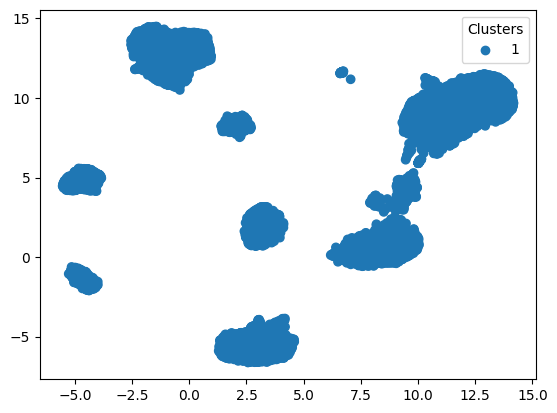

In [ ]:
visualize_dimensionality_reduction(umap_embedding_no, sample_original['constant'])

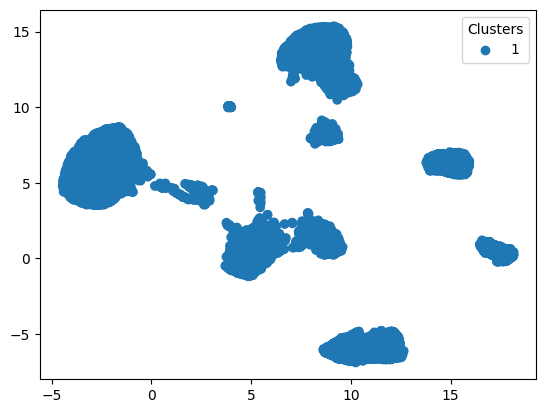

In [ ]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['constant'])

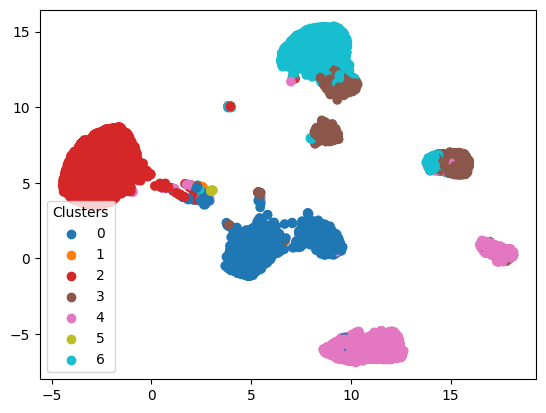

In [423]:
visualize_dimensionality_reduction(umap_embedding_st, sample_original['st_kmeans7'])

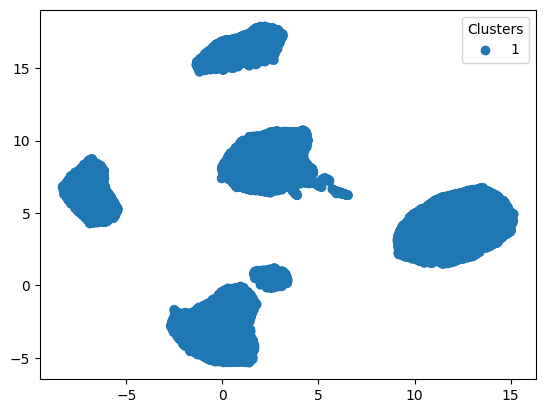

In [ ]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['constant'])

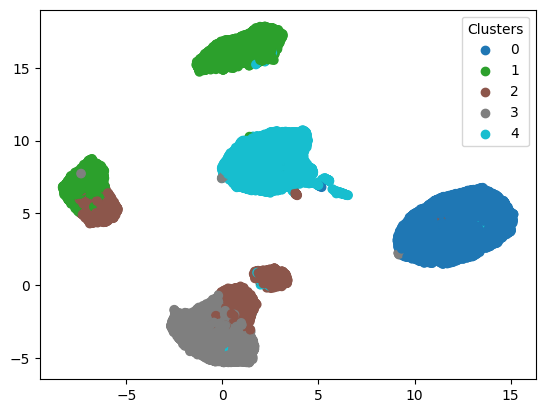

In [414]:
visualize_dimensionality_reduction(umap_embedding_mm, sample_original['mm_ward5'])

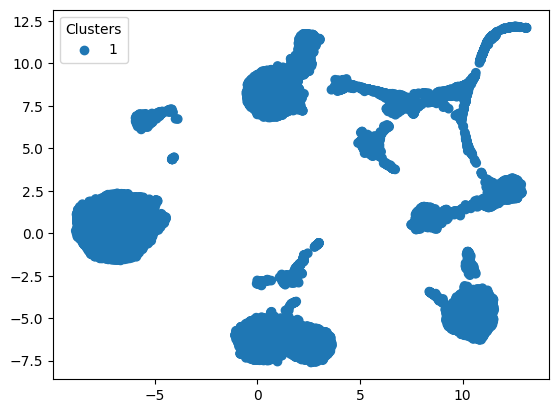

In [ ]:
visualize_dimensionality_reduction(umap_embedding_rb, sample_original['constant'])

-----

In [473]:
preference_metrics2 = ['beer', 'bottled_water', 'bread', 'dairy', 'fresh_foods', 'frozen_foods', 'fruit_beverages', 'pastry', 'sodas', 'toiletries', 'veggies', 'wines']

In [480]:
# umap_embedding_no_meat = umap_object.fit_transform(sample_no_scl[preference_metrics2])
umap_embedding_st_meat = umap_object.fit_transform(sample_st_scl[preference_metrics2])
umap_embedding_mm_meat = umap_object.fit_transform(sample_mm_scl[preference_metrics2])
umap_embedding_rb_meat = umap_object.fit_transform(sample_rb_scl[preference_metrics2])

In [477]:
sample_original2 = sample_original.copy()
sample_original2['constant'] = 1

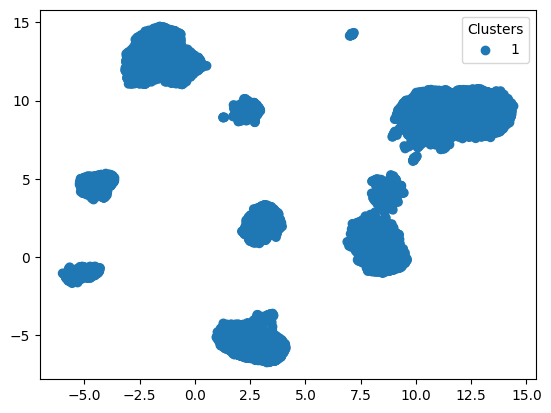

In [479]:
visualize_dimensionality_reduction(umap_embedding_no_meat, sample_original2['constant'])

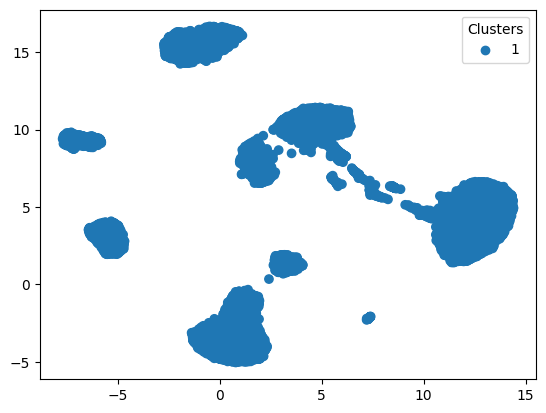

In [481]:
visualize_dimensionality_reduction(umap_embedding_st_meat, sample_original2['constant'])

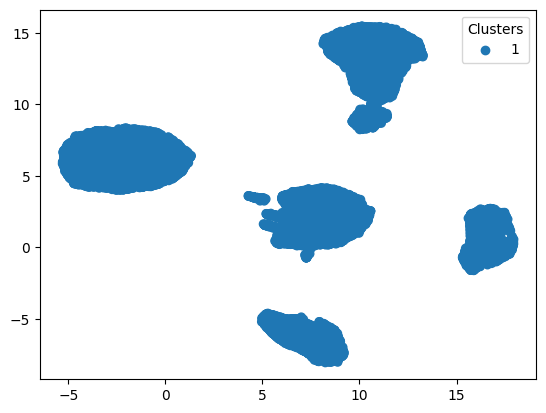

In [482]:
visualize_dimensionality_reduction(umap_embedding_mm_meat, sample_original2['constant'])

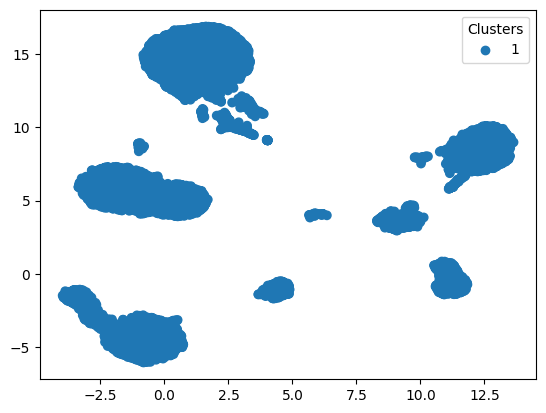

In [483]:
visualize_dimensionality_reduction(umap_embedding_rb_meat, sample_original2['constant'])